In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Creating a decision tree

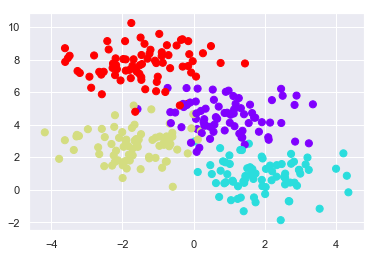

In [2]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples = 300, centers = 4, random_state =0, cluster_std = 1.0)
plt.scatter(X[:,0], X[:,1],c=y,s=50,cmap='rainbow')

In [7]:

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

# we create a function to visualization:

def vis(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)


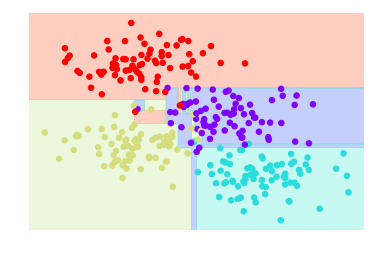

In [8]:
vis(DecisionTreeClassifier(),X,y)

可见 随着树的划分深度增加， 出现了一些无意义的区域划分，对于 这种情况我们要将它进行剪枝； 或者将多颗决策树集成在一起，集体表决

# Ensembles of Estimators: Random Forests

This notion—that multiple overfitting estimators can be combined to reduce the effect of this overfitting—is what underlies an ensemble method called bagging. Bagging makes use of an ensemble (a grab bag, perhaps) of parallel estimators, each of which over-fits the data, and averages the results to find a better classification. An ensemble of randomized decision trees is known as a random forest.

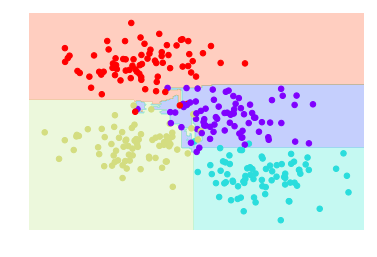

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree,n_estimators =100, max_samples =0.8, random_state =1 )
visualize_classifier(bag,X,y)


In this example, we have randomized the data by fitting each estimator with a random subset of 80% of the training points. In practice, decision trees are more effectively randomized by injecting some stochasticity in how the splits are chosen: this way all the data contributes to the fit each time, but the results of the fit still have the desired randomness. For example, when determining which feature to split on, the randomized tree might select from among the top several features. You can read more technical details about these randomization strategies in the Scikit-Learn documentation and references within.

In Scikit-Learn, such an optimized ensemble of randomized decision trees is implemented in the RandomForestClassifier estimator, which takes care of all the randomization automatically. All you need to do is select a number of estimators, and it will very quickly (in parallel, if desired) fit the ensemble of trees:

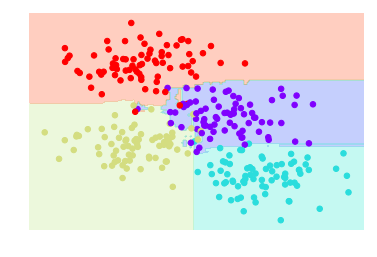

In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state = 0)
visualize_classifier(model,X,y)

# Random Forest Regression

随机森林也可以用于回归类的问题

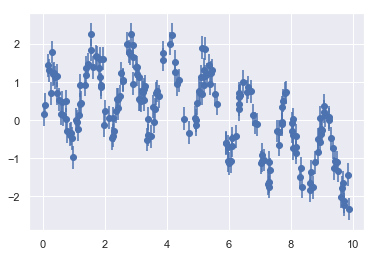

In [11]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

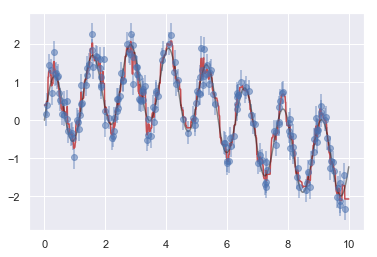

In [15]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:,None],y)

xfit = np.linspace(0,10,1000)
yfit = forest.predict(xfit[:,None])
ytrue = model(xfit,sigma=0)
plt.errorbar(x,y,0.3,fmt = 'o', alpha =0.5)
plt.plot(xfit,yfit,'-r')
plt.plot(xfit, ytrue , '-k', alpha =0.5)


Here the true model is shown in the smooth gray curve, while the random forest model is shown by the jagged red curve. As you can see, the non-parametric random forest model is flexible enough to fit the multi-period data, without us needing to specifying a multi-period model!(stock market maybe)

# Example: Digits recognition
    

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['DESCR', 'target', 'target_names', 'images', 'data'])

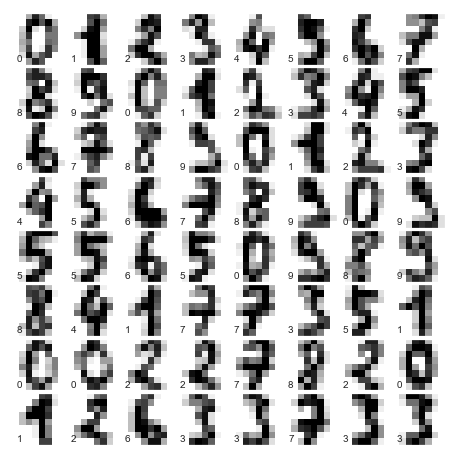

In [17]:

# set up the figure# set up 
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [20]:
from sklearn.cross_validation import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(digits.data,digits.target,random_state = 0)

model = RandomForestClassifier(n_estimators = 1000)
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)

In [23]:
import sklearn.metrics as m
m.accuracy_score(ypred,ytest)

0.97999999999999998

In [25]:
print(m.classification_report(ypred,ytest))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       1.00      0.96      0.98        45
          2       0.95      1.00      0.98        42
          3       0.98      0.98      0.98        45
          4       0.97      1.00      0.99        37
          5       0.98      0.98      0.98        48
          6       1.00      1.00      1.00        52
          7       1.00      0.96      0.98        50
          8       0.94      0.98      0.96        46
          9       0.98      0.98      0.98        47

avg / total       0.98      0.98      0.98       450



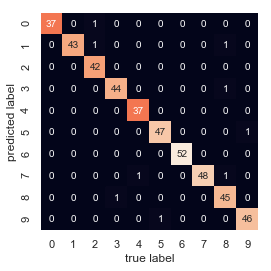

In [26]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

very powerful classifier with nearly 98% accuracy and no obvious weakpoint in classifying any images

总结：


随机森林是一个用随机方式建立的，包含多个决策树的分类器。其输出的类别是由各个树输出的类别的众数而定。
        随机性主要体现在两个方面：（1）训练每棵树时，从全部训练样本（样本数为N）中选取一个可能有重复的大小同样为N的数据集进行训练（即bootstrap取样）；（2）在每个节点，随机选取所有特征的一个子集，用来计算最佳分割方式。

优点
1、 在当前的很多数据集上，相对其他算法有着很大的优势，表现良好

2、它能够处理很高维度（feature很多）的数据，并且不用做特征选择

        PS：特征子集是随机选择的

3、在训练完后，它能够给出哪些feature比较重要

        PS：http://blog.csdn.net/keepreder/article/details/47277517

4、在创建随机森林的时候，对generlization error使用的是无偏估计，模型泛化能力强

5、训练速度快，容易做成并行化方法

       PS：训练时树与树之间是相互独立的

6、 在训练过程中，能够检测到feature间的互相影响

7、 实现比较简单

8、 对于不平衡的数据集来说，它可以平衡误差。

9、如果有很大一部分的特征遗失，仍可以维持准确度。



缺点：
1、随机森林已经被证明在某些噪音较大的分类或回归问题上会过拟

2、对于有不同取值的属性的数据，取值划分较多的属性会对随机森林产生更大的影响，所以随机森林在这种数据上产出的属性权值是不可信的。

# 随机森林是一种强大的算法， 日后会继续补充一些使用的实例，如利用它作特征选择等等